In [3]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg"
img = url_to_image(url)
grayscaled = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)



downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/bookpage1.jpg


In [6]:
def show_gray_img(image):
    plt.figure(figsize=(10, 15))
    plt.imshow(image, cmap='gray')

### Objects count

In [36]:
img = cv2.imread('./images2/count9.jpg')

<Figure size 1080x720 with 0 Axes>

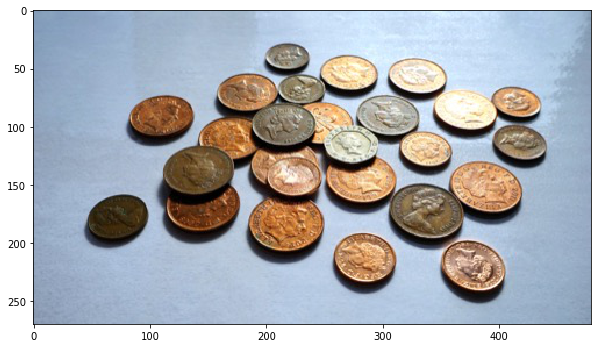

In [37]:
plt.figure(figsize=(15, 10))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_gray_img(img)

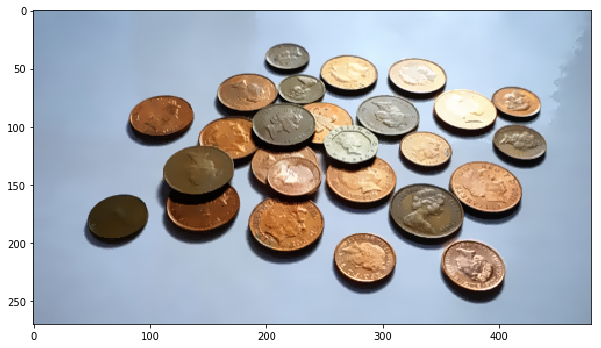

In [94]:
shifted = cv2.pyrMeanShiftFiltering(img, 5, 20)
show_gray_img(shifted)

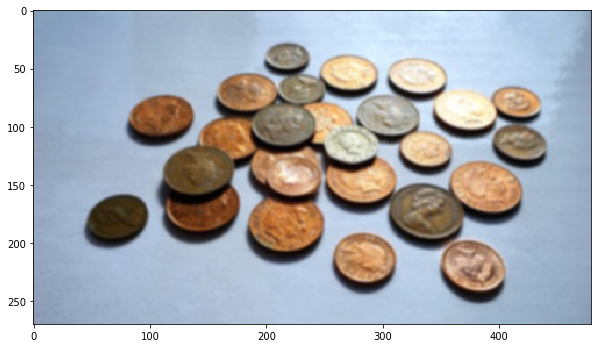

In [103]:
median = cv2.GaussianBlur(img,(5,5),0)
show_gray_img(median)

In [104]:
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 180, 255,
cv2.THRESH_BINARY)[1]

kernel = np.ones((5,5), np.uint8) 
thresh = cv2.dilate(thresh, kernel, iterations=1) 



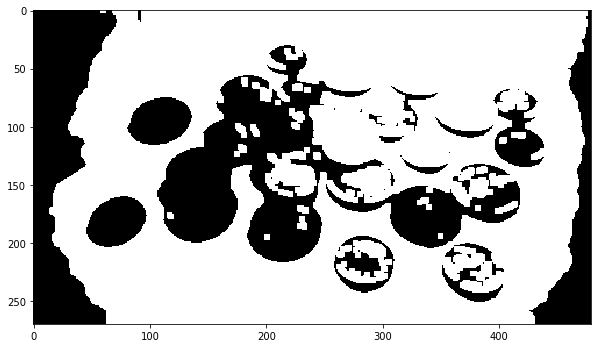

In [105]:
show_gray_img(thresh)

In [81]:
!pip install imutils

[INFO] 1 unique contours found


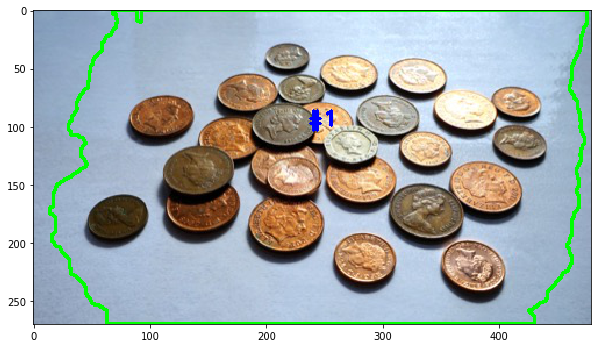

In [82]:
import imutils
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))

image = img.copy()

# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

show_gray_img(image)

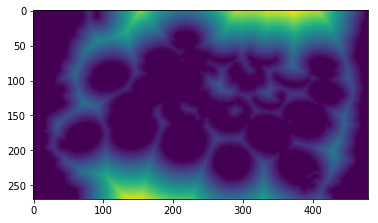

In [83]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

D = ndimage.distance_transform_edt(thresh)
plt.imshow(D)

In [84]:
localMax = peak_local_max(D, indices=False, min_distance=15, labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

#cv2_imshow(img)

[INFO] 19 unique segments found


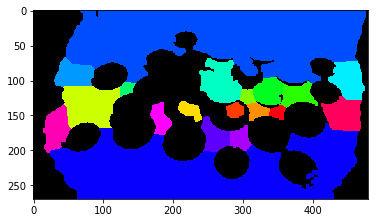

In [85]:
plt.imshow(labeled_img)